# Localizando Terras Indígenas no Estado do Mato Grosso.

Este jupyter notebook tem como objetivo somente colocar em prática alguns dos conhecimentos em análise exploratória de dados geográficos que adquiri nos últimos tempos.

* Importando bibliotecas

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Incluindo Shapefile com os estados do Brasil. 
* Fonte: <a href="https://geoservicos.ibge.gov.br/geoserver/ows?version=1.3.0">Geoserver IBGE</a>, camada: CGEO:UF_2013

In [2]:
# Lendo GeoDataFrame estados.
estados = gpd.read_file("estados/estados.shp")

In [3]:
# Verificando tipo do arquivo criado.
type(estados)

geopandas.geodataframe.GeoDataFrame

* Para realizar operações com arquivos shapefiles diferentes utilizando GeoPandas é necessário que os arquivos estejam no mesmo sistema de projeção geográfica, caso contrário, é necessário fazer a conversão.

In [4]:
# Verificando o sistema de coordenadas do arquivo
print(estados.crs)

epsg:4674


Como podemos verificar, o EPSG do arquivo é 4674, Sirgas 2000

In [5]:
# Apresentando as cinco primeiras linhas do DataFrame.
estados.head()

,uf,nome_uf,sigla_uf,grandreg,geometry
0,11.0,Rondônia,RO,Norte,"POLYGON ((-63.38701 -7.97659, -63.11838 -7.977..."
1,12.0,Acre,AC,Norte,"POLYGON ((-73.18253 -7.33550, -73.12014 -7.358..."
2,13.0,Amazonas,AM,Norte,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125..."
3,14.0,Roraima,RR,Norte,"POLYGON ((-60.17884 5.23017, -60.17245 5.22656..."
4,15.0,Pará,PA,Norte,"MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ..."


A coluna geometry é a coluna onde ficam as coordenadas do shapefile, no GeoDataFrame de estados elas podem ser do tipo Polygon ou Multipolygon. Quando uma terra indígena é formada por um ou mais polígonos, ela é do tipo Multipolígono.

* Selecionando o estado do Mato Grosso.

In [6]:
# Filtrando estados pela sigla.
mt = estados[estados["sigla_uf"] == 'MT']

In [7]:
# Apresentando a linha contendo o resultado da seleção.
mt

,uf,nome_uf,sigla_uf,grandreg,geometry
22,51.0,Mato Grosso,MT,Centro-Oeste,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."


* Plotando o mapa do estado do Mato Grosso.

Text(0.5, 1.0, 'Estado do Mato Grosso')

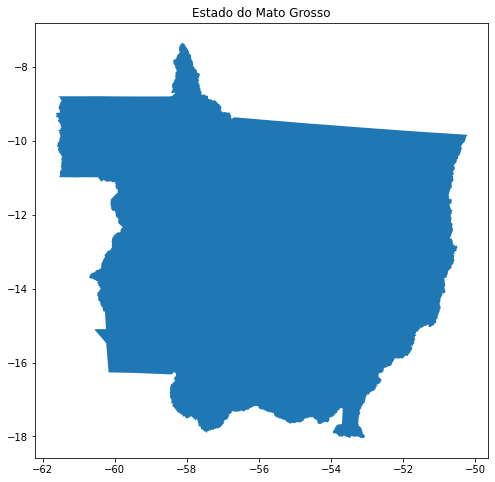

In [8]:
mt.plot(figsize=(15,8))
plt.title("Estado do Mato Grosso")

## Incluindo o GeoDataFrame com as Terras Indígenas.

* Fonte: <a href="http://geoserver.funai.gov.br">Geoserver Funai</a>, camada: ti_sirgas

In [9]:
# Carregando DataFrame.
terras_indigenas = gpd.read_file("ti_sirgas/ti_sirgas.shp")

In [10]:
# Verificando o sistema de projeção do arquivo.
print(terras_indigenas.crs)

epsg:4674


Podemos ver que o arquivo de terras indígenas também está no EPSG 4674, Sirgas 2000.

In [11]:
# Apresentando as cinco primeiras linhas do DataFrame de terras indígenas.
terras_indigenas.head()

,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,superficie,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,dominio_un,geometry
0,1,101,Acapuri de Cima,Kokama,Fonte Boa,AM,18393.9411,Declarada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL DO ALTO SOLIMOES,Não,3.020200e+10,COORDENACAO REGIONAL DO ALTO SOLIMOES,CR-AS,f,"POLYGON ((-66.88359 -2.53752, -66.87457 -2.537..."
1,2,201,Acimã,Apurinã,Lábrea,AM,40686.0340,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL MÉDIO PURUS,Não,3.020200e+10,COORDENACAO REGIONAL MÉDIO PURUS,CR-Mpur,t,"POLYGON ((-66.30929 -7.79995, -66.30929 -7.799..."
2,57,601,Aconã,Tingui-Botó,Traipu,AL,267.7862,Regularizada,Reserva Indígena,None,COORDENACAO REGIONAL NORDESTE I,Não,3.020200e+10,COORDENACAO REGIONAL NORDESTE I,CR-NE-I,t,"POLYGON ((-36.94514 -10.07113, -36.94377 -10.0..."
3,62,401,Água Preta/Inari,Apurinã,Pauini,AM,139763.6705,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL MÉDIO PURUS,Não,3.020200e+10,COORDENACAO REGIONAL MÉDIO PURUS,CR-Mpur,t,"POLYGON ((-67.29764 -7.33958, -67.29713 -7.338..."
4,3,501,Águas Belas,Pataxó,Prado,BA,1189.0649,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL SUL DA BAHIA,Não,3.020200e+10,COORDENACAO REGIONAL SUL DA BAHIA,CR-SBA,t,"POLYGON ((-39.30549 -16.90608, -39.30501 -16.9..."


* Filtrando as terras indigenas presentes no estado do Mato Grosso, algumas terras indígenas estão entre o Mato Grosso e o Amazonas, Pará e Rondônia.

In [12]:
# Aplicando seleção.
ti_mt = terras_indigenas.loc[(terras_indigenas["uf_sigla"] == "MT") | (terras_indigenas["uf_sigla"] == "MT,PA") 
                             | (terras_indigenas["uf_sigla"] == "PA,MT") |  (terras_indigenas["uf_sigla"] == "MT,RO") 
                             | (terras_indigenas["uf_sigla"] == "RO,MT")]

In [13]:
# Exibindo o resultado da seleção de terras indígenas no estado do Mato Grosso.
ti_mt.head()

,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,superficie,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,dominio_un,geometry
24,8,68301,Apiaká do Pontal e Isolados,"Isolados,Apiaká",Apiacás,MT,982324.0000,Delimitada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL NORTE DO MATO GROSSO,Não,3.020200e+10,COORDENACAO REGIONAL NORTE DO MATO GROSSO,CR-NMT,f,"POLYGON ((-58.32480 -7.97798, -58.32524 -7.973..."
25,7,2301,Apiaka/Kayabi,"Apiaká,Kaiabi",Juara,MT,109245.3822,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,Não,3.020200e+10,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,CR-NOMT,t,"POLYGON ((-57.23662 -10.81354, -57.23542 -10.8..."
39,29,3301,Arara do Rio Branco,Arara do Acre,"Aripuanã,Colniza",MT,114842.4748,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,Não,3.020200e+10,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,CR-NOMT,t,"POLYGON ((-59.39807 -9.77770, -59.39954 -9.778..."
44,69,3901,Areões,Xavante,Água Boa,MT,218515.0000,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL RIBEIRAO CASCALHEIRA,Não,3.020200e+10,COORDENACAO REGIONAL RIBEIRAO CASCALHEIRA,CR-RC,t,"POLYGON ((-51.89056 -14.15934, -51.89049 -14.1..."
45,70,4201,Aripuanã,Cinta Larga,"Aripuanã,Juína",MT,750649.2650,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,Não,3.020200e+10,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,CR-NOMT,t,"POLYGON ((-60.12701 -10.10921, -60.12660 -10.1..."


* Plotando mapa com as terras indígenas no estado do Mato Grosso.

Text(0.5, 1.0, 'Terras Indígenas')

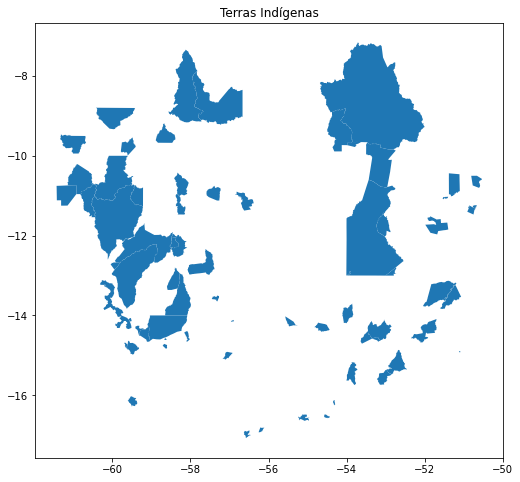

In [14]:
# Exibindo mapa das terras indígenas.
ti_mt.plot(figsize=(15,8))
plt.title("Terras Indígenas")

* Exibindo o mapa do estado do Matro Grosso contendo as suas respectivas terras indígenas.

Text(0.5, 1.0, 'Terras Indígenas no Estado do Mato Grosso')

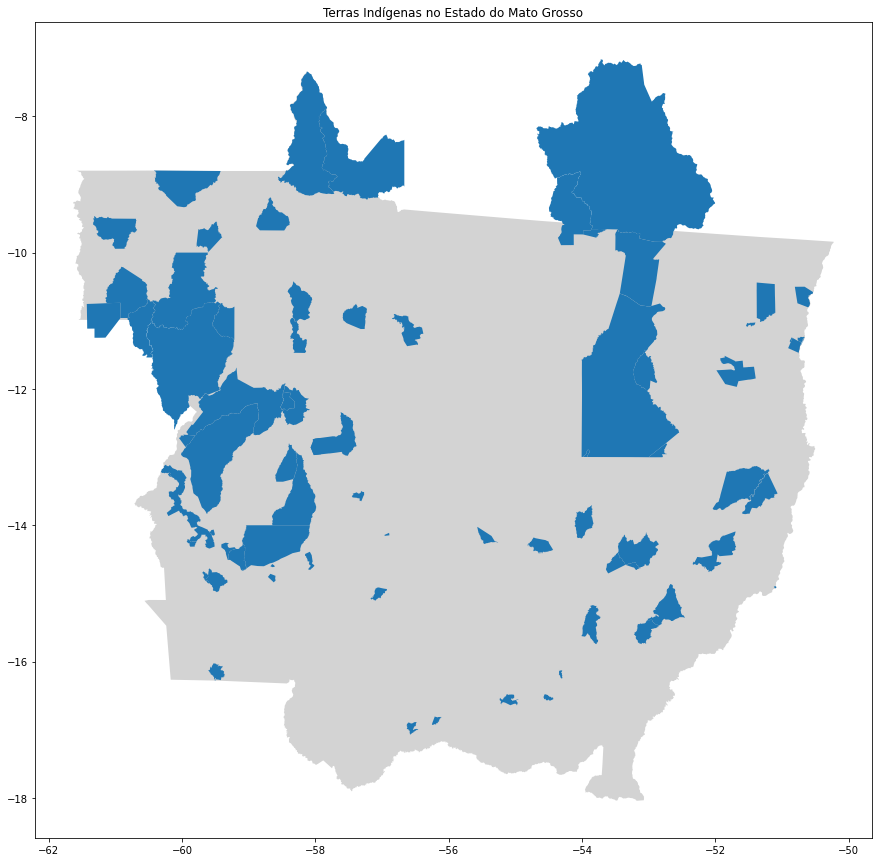

In [15]:
# Plotando o mapa do estado do Mato Grosso e as terras indígenas juntos.
fig, ax = plt.subplots(figsize = (15,15))
mt.plot(ax = ax, color = "lightgrey")
ti_mt.plot(ax = ax)
plt.title("Terras Indígenas no Estado do Mato Grosso")

## Próximos passos

Como próximos passos podemos:<br>
1 - Apresentar o recorte de áreas indígenas e suas porções que estão somente dentro do estado do Mato Grosso.<br>
2 - Verificar a quantidade de área do estado que é pertencente a terras indígenas.<br>
3 - Melhorar a apresentação do mapa.<br>
4 - Exportar o mapa em formato PDF.

## Atualização

- Apresentando o recorte de terras indígenas e suas porções que estão somente dentro do estado do Mato Grosso.

* Para fazer esse recorte o GeoPandas tem a função <a href="https://geopandas.org/docs/user_guide/set_operations.html">geopandas.overlay()</a> que retorna somente as geometrias compartilhadas entre os dois DataFrames.

In [16]:
# Ao invés de fazer a seleção de terras indígenas pelo atributo UF do DataFrame de terras indígenas, vamos simplesmente
# usar a função overlay() para fazer o recorte de todas as geometrias dentro do estado do Mato Grosso.
terras_recorte = gpd.overlay(mt, ti_mt, how='intersection')

In [17]:
# Apresentando o resultado do recorte.
terras_recorte

,uf,nome_uf,sigla_uf,grandreg,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,...,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,dominio_un,geometry
0,51.0,Mato Grosso,MT,Centro-Oeste,8,68301,Apiaká do Pontal e Isolados,"Isolados,Apiaká",Apiacás,MT,...,Delimitada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL NORTE DO MATO GROSSO,Não,3.020200e+10,COORDENACAO REGIONAL NORTE DO MATO GROSSO,CR-NMT,f,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."
1,51.0,Mato Grosso,MT,Centro-Oeste,7,2301,Apiaka/Kayabi,"Apiaká,Kaiabi",Juara,MT,...,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,Não,3.020200e+10,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,CR-NOMT,t,"POLYGON ((-57.23662 -10.81354, -57.23542 -10.8..."
2,51.0,Mato Grosso,MT,Centro-Oeste,29,3301,Arara do Rio Branco,Arara do Acre,"Aripuanã,Colniza",MT,...,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,Não,3.020200e+10,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,CR-NOMT,t,"POLYGON ((-59.39807 -9.77770, -59.39954 -9.778..."
3,51.0,Mato Grosso,MT,Centro-Oeste,69,3901,Areões,Xavante,Água Boa,MT,...,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL RIBEIRAO CASCALHEIRA,Não,3.020200e+10,COORDENACAO REGIONAL RIBEIRAO CASCALHEIRA,CR-RC,t,"POLYGON ((-51.89056 -14.15934, -51.89049 -14.1..."
4,51.0,Mato Grosso,MT,Centro-Oeste,70,4201,Aripuanã,Cinta Larga,"Aripuanã,Juína",MT,...,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,Não,3.020200e+10,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,CR-NOMT,t,"POLYGON ((-59.98728 -11.11541, -59.99121 -11.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,51.0,Mato Grosso,MT,Centro-Oeste,167,48501,Utiariti,Paresí,"Sapezal,Campo Novo do Parecis",MT,...,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL DE CUIABA,Não,3.020200e+10,COORDENACAO REGIONAL DE CUIABA,CR-CGB,t,"POLYGON ((-58.33581 -13.32364, -58.33550 -13.3..."
69,51.0,Mato Grosso,MT,Centro-Oeste,61,48601,Vale do Guaporé,Nambikwára,"Comodoro,Nova Lacerda",MT,...,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL DE CUIABA,Sim,3.020200e+10,COORDENACAO REGIONAL DE CUIABA,CR-CGB,t,"POLYGON ((-60.31967 -13.21612, -60.31528 -13.2..."
70,51.0,Mato Grosso,MT,Centro-Oeste,1654,49801,Wawi,Kisêdjê,Querência,MT,...,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL XINGU,Não,3.020200e+10,COORDENACAO REGIONAL XINGU,CR-XIN,t,"POLYGON ((-53.05332 -11.47262, -53.05280 -11.4..."
71,51.0,Mato Grosso,MT,Centro-Oeste,133,73601,Wedezé,Xavante,Cocalinho,MT,...,Delimitada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL XAVANTE,Não,3.020200e+10,COORDENACAO REGIONAL XAVANTE,CR-XAV,f,"POLYGON ((-51.20557 -13.24924, -51.06608 -13.5..."


## Apresentando o mapa com o resultado do recorte feito.

Agora vamos plotar o mapa das terras indígenas contidas dentro do estado do Mato Grosso.

Text(0.5, 1.0, 'Porções de Terras Indígenas que estão contidas dentro do polígono do Estado do Mato Grosso')

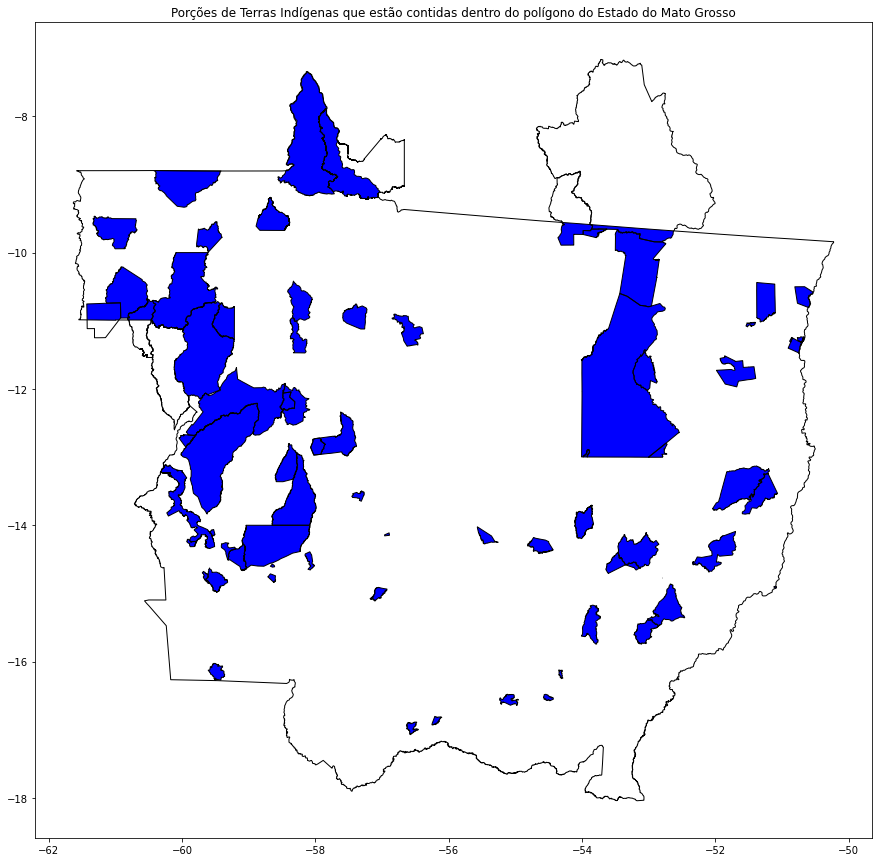

In [18]:
ax = terras_recorte.plot(color='blue', figsize=(15,15))
mt.plot(ax=ax, facecolor='none', edgecolor='k')
ti_mt.plot(ax=ax, facecolor='none', edgecolor='k')
plt.title("Porções de Terras Indígenas que estão contidas dentro do polígono do Estado do Mato Grosso")

## Próximos passos:

Como próximos passos podemos:<br>
1 - <s>Apresentar o recorte de áreas indígenas e suas porções que estão somente dentro do estado do Mato Grosso.</s><br>
2 - Verificar a quantidade de área do estado que é pertencente a terras indígenas.<br>
3 - Melhorar a apresentação do mapa.<br>
4 - Exportar o mapa em formato PDF.

## Atualização

Após algumas análises, pude verificar que a própria função gpd.overlay() já é um filtro, sendo assim não é mais necessário utilizar a seleção de terras indígenas pela coluna uf_sigla, bastando só aplicar a função para saber quais terras indígenas intersectam ou estão contidas dentro do estado do Mato Grosso.

### Apresentando terras indígenas dentro do estado do Mato Grosso.

In [19]:
# Aplicando a seleção
terras_no_mt = gpd.overlay(mt, terras_indigenas, how = 'intersection')

In [20]:
# Apresentando a o resultado do dataset.
terras_no_mt

,uf,nome_uf,sigla_uf,grandreg,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,...,fase_ti,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,dominio_un,geometry
0,51.0,Mato Grosso,MT,Centro-Oeste,8,68301,Apiaká do Pontal e Isolados,"Isolados,Apiaká",Apiacás,MT,...,Delimitada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL NORTE DO MATO GROSSO,Não,3.020200e+10,COORDENACAO REGIONAL NORTE DO MATO GROSSO,CR-NMT,f,"POLYGON ((-57.93439 -7.65677, -57.93044 -7.657..."
1,51.0,Mato Grosso,MT,Centro-Oeste,7,2301,Apiaka/Kayabi,"Apiaká,Kaiabi",Juara,MT,...,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,Não,3.020200e+10,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,CR-NOMT,t,"POLYGON ((-57.23662 -10.81354, -57.23542 -10.8..."
2,51.0,Mato Grosso,MT,Centro-Oeste,29,3301,Arara do Rio Branco,Arara do Acre,"Aripuanã,Colniza",MT,...,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,Não,3.020200e+10,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,CR-NOMT,t,"POLYGON ((-59.39807 -9.77770, -59.39954 -9.778..."
3,51.0,Mato Grosso,MT,Centro-Oeste,69,3901,Areões,Xavante,Água Boa,MT,...,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL RIBEIRAO CASCALHEIRA,Não,3.020200e+10,COORDENACAO REGIONAL RIBEIRAO CASCALHEIRA,CR-RC,t,"POLYGON ((-51.89056 -14.15934, -51.89049 -14.1..."
4,51.0,Mato Grosso,MT,Centro-Oeste,70,4201,Aripuanã,Cinta Larga,"Aripuanã,Juína",MT,...,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,Não,3.020200e+10,COORDENACAO REGIONAL NOROESTE DO MATO GROSSO,CR-NOMT,t,"POLYGON ((-59.98728 -11.11541, -59.99121 -11.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,51.0,Mato Grosso,MT,Centro-Oeste,167,48501,Utiariti,Paresí,"Sapezal,Campo Novo do Parecis",MT,...,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL DE CUIABA,Não,3.020200e+10,COORDENACAO REGIONAL DE CUIABA,CR-CGB,t,"POLYGON ((-58.33581 -13.32364, -58.33550 -13.3..."
73,51.0,Mato Grosso,MT,Centro-Oeste,61,48601,Vale do Guaporé,Nambikwára,"Comodoro,Nova Lacerda",MT,...,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL DE CUIABA,Sim,3.020200e+10,COORDENACAO REGIONAL DE CUIABA,CR-CGB,t,"POLYGON ((-60.31967 -13.21612, -60.31528 -13.2..."
74,51.0,Mato Grosso,MT,Centro-Oeste,1654,49801,Wawi,Kisêdjê,Querência,MT,...,Regularizada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL XINGU,Não,3.020200e+10,COORDENACAO REGIONAL XINGU,CR-XIN,t,"POLYGON ((-53.05332 -11.47262, -53.05280 -11.4..."
75,51.0,Mato Grosso,MT,Centro-Oeste,133,73601,Wedezé,Xavante,Cocalinho,MT,...,Delimitada,Tradicionalmente ocupada,None,COORDENACAO REGIONAL XAVANTE,Não,3.020200e+10,COORDENACAO REGIONAL XAVANTE,CR-XAV,f,"POLYGON ((-51.20557 -13.24924, -51.06608 -13.5..."


Exportando o shapefile com a seleção.

In [21]:
# criando e exportando o arquivo shapefile.
# usaremos esse shape no futuro para calcular a área das terras indígenas dentro do estado do MT.

terras_no_mt.to_file("ti_sirgas/terras_no_mt.shp")

### Plotando o resultado em um mapa

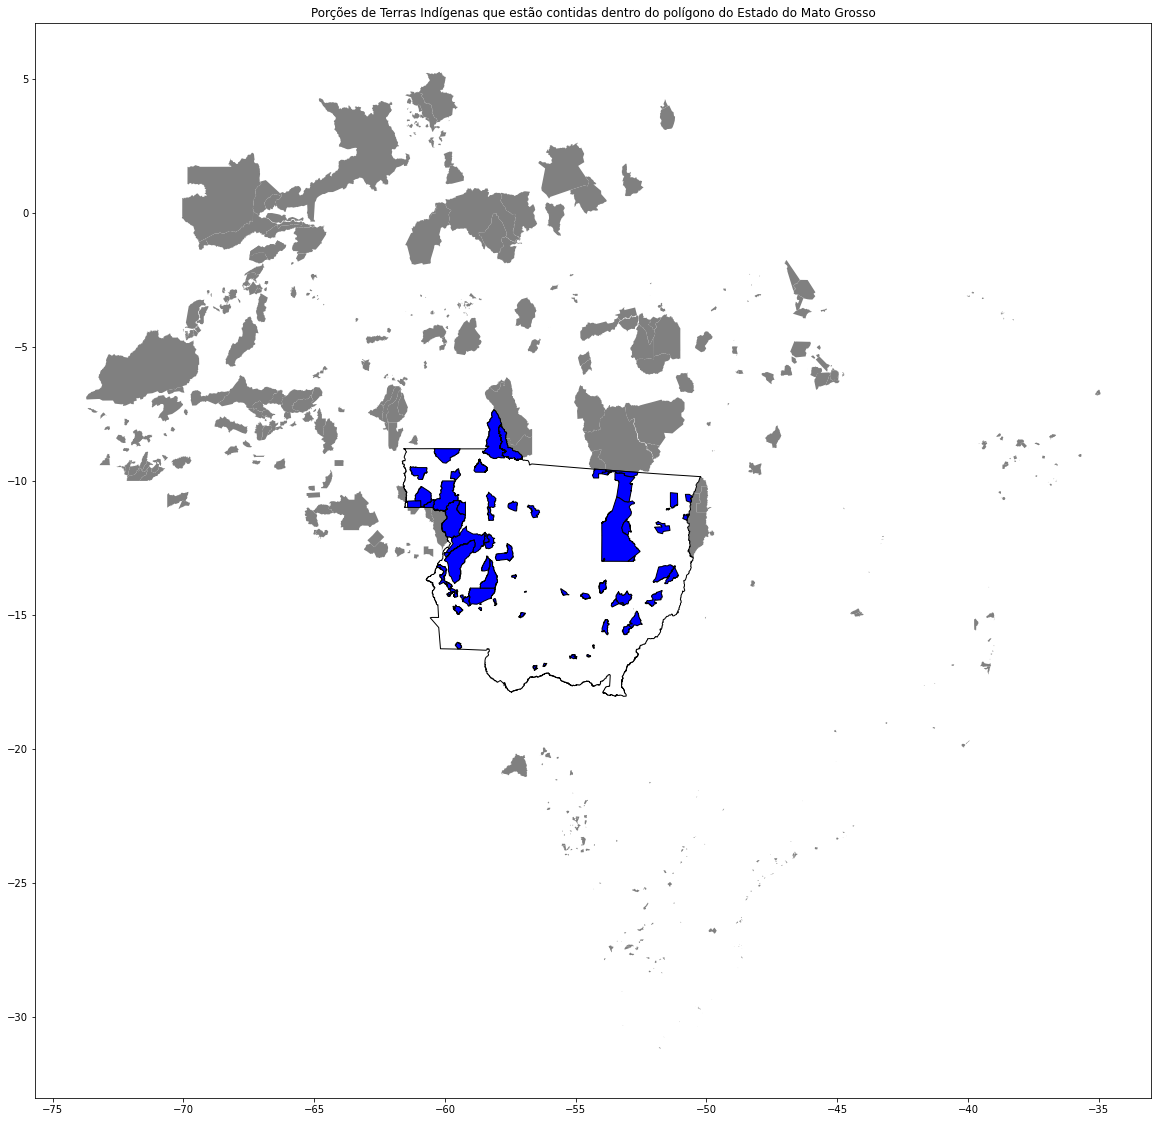

In [22]:
ax = terras_indigenas.plot(color = 'gray', figsize=(20,20))
mt.plot(ax = ax, facecolor = 'none', edgecolor = 'k')
terras_no_mt.plot(ax = ax, facecolor = 'blue', edgecolor = 'k')
plt.title("Porções de Terras Indígenas que estão contidas dentro do polígono do Estado do Mato Grosso")

# Salvando o mapa em PDF.
plt.savefig("mapa_tis_mt.pdf")

plt.show()

Como resultado temos um mapa de terras indigenas no Brasil destacando o estado do Mato Grosso e as áreas indígenas inseridas dentro dele.

## Próximos passos:

Como próximos passos podemos:<br>
1 - <s>Apresentar o recorte de áreas indígenas e suas porções que estão somente dentro do estado do Mato Grosso.</s><br>
2 - Verificar a quantidade de área do estado que é pertencente a terras indígenas.<br>
3 - Melhorar a apresentação do mapa.<br>
4 - <s>Exportar o mapa em formato PDF</s>.

## Atualização

Como podemos ver no mapa apresentado, existe um pedaço da terra indígena Menkragnoti dentro do estado do Mato Grosso, vamos calcular o tamanho da área inserida dentro do estado.
Esse calcula será feito em hectáres, para isso devemos primeiro transformar o CRS do arquivo shapefile para Sirgas 2000 / UTM zone 22S.

In [23]:
# Transformando o CRS do shapefile de terras_no_mt.
terras_no_mt_utm = terras_no_mt.to_crs("EPSG:31982")

# Conferindo a transformação
print(terras_no_mt_utm.crs)

EPSG:31982


## Fazendo o cálculo de área

Primeiro vamos salvar somente a feição da terra indígena Menkragnoti.

In [24]:
menkragnoti_area_ha = terras_no_mt_utm[terras_no_mt_utm["terrai_cod"] == 28701]

Agora vamos criar uma nova coluna chamada área e fazer o cálculo da feição incidente no estado do Mato Grosso em hectáres.

In [25]:
menkragnoti_area_ha["area"] = round(menkragnoti_area_ha["geometry"].area / 10000, 2)

C:\Users\gladston\Anaconda3\envs\curos_auto_gis\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [26]:
# Apresentando o dataFrame com o resultado.
menkragnoti_area_ha

,uf,nome_uf,sigla_uf,grandreg,gid,terrai_cod,terrai_nom,etnia_nome,municipio_,uf_sigla,...,modalidade,reestudo_t,cr,faixa_fron,undadm_cod,undadm_nom,undadm_sig,dominio_un,geometry,area
33,51.0,Mato Grosso,MT,Centro-Oeste,351,28701,Menkragnoti,Kayapó,"Matupá,Peixoto de Azevedo,Altamira,São Félix d...","PA,MT",...,Tradicionalmente ocupada,None,COORDENACAO REGIONAL KAYAPÓ SUL DO PARÁ,Não,3.020200e+10,COORDENACAO REGIONAL KAYAPÓ SUL DO PARÁ,CR-KSPA,t,"POLYGON ((185058.565 8938612.059, 209646.793 8...",146979.28


A área da terra indígena Menkragnoti incidente no estado do Mato Grosso é 146979.28 há.

## Próximos passos:

Como próximos passos podemos:<br>
1 - <s>Apresentar o recorte de áreas indígenas e suas porções que estão somente dentro do estado do Mato Grosso.</s><br>
2 - Verificar a quantidade de área do estado que é pertencente a terras indígenas.<br>
3 - Melhorar a apresentação do mapa.<br>
4 - <s>Exportar o mapa em formato PDF</s>.<br>
5 - <s>Calcular a área da T.I. Menkragnoti inserida no estado do MT.</s>